<a href="https://colab.research.google.com/github/RiseAboveAll/PYTORCH_Learning/blob/master/Functional_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import torch
from torch import nn
from torchvision import transforms
import torchvision
from torch.nn import functional as F
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Load Dataset

In [2]:
train_dataset=torchvision.datasets.CIFAR10(root='.',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.CIFAR10(root='.',train=False,transform=transforms.ToTensor(),download=True)

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [3]:
#We can see the data is not in tensor form , rather it is in numpy array form
train_dataset.data.shape

(50000, 32, 32, 3)

In [4]:
K=len(set(train_dataset.targets))

In [5]:
#Number of Classes
K

10

## Data Loader

In [6]:
batch_size=128
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

## Model Buidling :

In [7]:
class CNN(nn.Module):
  def __init__(self,K):
    super(CNN,self).__init__()
    #Define Convolution Layer
    self.conv1=nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=2)
    self.conv2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=2)
    self.conv3=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=2)
    #Define Dense Layer
    self.Dense1=nn.Linear(128*3*3,1024)
    self.Dense2=nn.Linear(1024,K)
  def forward(self,X):
    X=F.relu(self.conv1(X))
    X=F.relu(self.conv2(X))
    X=F.relu(self.conv3(X))
    X=X.view(-1,128*3*3)
    X=F.dropout(X,p=.5)
    X=F.relu(self.Dense1(X))
    X=F.dropout(X,p=.2)
    X=self.Dense2(X)
    return X


In [8]:
model=CNN(K)

In [9]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


/usr/local/lib/python3.6/dist-packages/torch/cuda/__init__.py:125: UserWarning: 
Tesla T4 with CUDA capability sm_75 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the Tesla T4 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (Dense1): Linear(in_features=1152, out_features=1024, bias=True)
  (Dense2): Linear(in_features=1024, out_features=10, bias=True)
)

In [10]:
#Loss & Optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=.0001)

In [11]:
# Function to Encapsulate training
def batch_gradient(model,criterion,optimizer,train_loader,test_loader,epochs):
  train_losses=np.zeros(epochs)
  test_losses=np.zeros(epochs)
  for it in range(epochs):
    t0=datetime.now()
    train_loss=[]
    for inputs,targets in train_loader:
      #Move Data to GPU
      inputs,targets=inputs.to(device),targets.to(device)
      #Zero the parameter Gradient
      optimizer.zero_grad()
      #Forward Pass
      outputs=model(inputs)
      loss=criterion(outputs,targets)
      #Bacward Pass
      loss.backward()
      #Perform single optmization step
      optimizer.step()

      train_loss.append(loss.item())

    #Get train loss and test loss
    train_loss=np.mean(train_loss)
    test_loss=[]
    for inputs,targets in test_loader:
      #Move Data to GPU
      inputs,targets=inputs.to(device),targets.to(device)
      outputs=model(inputs)
      loss=criterion(outputs,targets)
      test_loss.append(loss.item())
    test_loss=np.mean(test_loss)

    #Save Losses
    train_losses[it]=train_loss
    test_losses[it]=test_loss
    dt=datetime.now()-t0
    print(f'Epoch {it+1}/{epochs},Duration : {dt} , Train Loss : {train_loss : .4f},  Test Loss : {test_loss : .4f}')
  return train_losses,test_losses






In [12]:
train_losses,test_losses=batch_gradient(model,criterion,optimizer,train_loader,test_loader,50)

Epoch 1/50,Duration : 0:00:08.097080 , Train Loss :  1.9753,  Test Loss :  1.7382
Epoch 2/50,Duration : 0:00:07.944251 , Train Loss :  1.6812,  Test Loss :  1.6352
Epoch 3/50,Duration : 0:00:07.874677 , Train Loss :  1.5990,  Test Loss :  1.5501
Epoch 4/50,Duration : 0:00:07.817937 , Train Loss :  1.5361,  Test Loss :  1.5016
Epoch 5/50,Duration : 0:00:07.758758 , Train Loss :  1.4870,  Test Loss :  1.4693
Epoch 6/50,Duration : 0:00:07.780633 , Train Loss :  1.4436,  Test Loss :  1.4385
Epoch 7/50,Duration : 0:00:07.759739 , Train Loss :  1.4142,  Test Loss :  1.3943
Epoch 8/50,Duration : 0:00:07.622221 , Train Loss :  1.3805,  Test Loss :  1.3718
Epoch 9/50,Duration : 0:00:07.588377 , Train Loss :  1.3518,  Test Loss :  1.3437
Epoch 10/50,Duration : 0:00:07.634181 , Train Loss :  1.3310,  Test Loss :  1.3295
Epoch 11/50,Duration : 0:00:07.606671 , Train Loss :  1.3072,  Test Loss :  1.3126
Epoch 12/50,Duration : 0:00:07.634073 , Train Loss :  1.2895,  Test Loss :  1.2991
Epoch 13/50,D

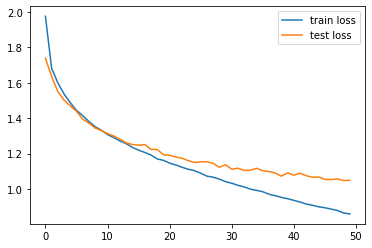

In [13]:
plt.plot(train_losses,label='train loss')
plt.plot(test_losses,label='test loss')
plt.legend()

In [15]:
# Accuracy

n_correct=0
n_total=0
for inputs,targets in train_loader:
  #Move data to GPU
  inputs,targets=inputs.to(device),targets.to(device)
  #Forward Pass
  outputs=model(inputs)
  #Get Prediction
  _,predictions=torch.max(outputs,1)
  #update counts
  n_correct += (predictions==targets).sum().item()
  n_total += targets.shape[0]
train_acc = n_correct/n_total
n_correct=0
n_total=0
for inputs,targets in test_loader:
  #Move data to GPU
  inputs,targets=inputs.to(device),targets.to(device)
  #Forward Pass
  outputs=model(inputs)
  #Get Prediction
  _,predictions=torch.max(outputs,1)
  #update counts
  n_correct += (predictions==targets).sum().item()
  n_total += targets.shape[0]
test_acc=n_correct/n_total
print(f'Train Acc : {train_acc:.4f}, Test Acc : {test_acc:.4f}')

Train Acc : 0.7053, Test Acc : 0.6299
